# Advanced Pandas

In [1]:
# known import statements
import pandas as pd
import sqlite3
import os

# new import statement
import numpy as np

In [2]:
# Get the Piazza data from 'piazza.db'

db_name = "piazza.db"
assert os.path.exists(db_name)
conn = sqlite3.connect(db_name)

def qry(sql):
    return pd.read_sql(sql, conn)

df = qry("""
    SELECT *
    FROM sqlite_master
    WHERE type='table'
""")
print(df.iloc[0]['sql'])

CREATE TABLE "piazza" (
"student_id" TEXT,
  "name" TEXT,
  "email" TEXT,
  "role" TEXT,
  "days_online" INTEGER,
  "posts" INTEGER,
  "answers" INTEGER,
  "edits" INTEGER,
  "followups" INTEGER,
  "replies_to_followups" INTEGER
)


In [3]:
piazza_df = pd.read_sql("""
    SELECT *
    FROM piazza
""", conn)
piazza_df.head(5)

student_id          name                  email  \
0  bffd301b-3ab9-42d7-bfb1-e5d56117543a    timid city    timid_city@wisc.edu   
1  0fda0d07-ff49-4f6b-86de-c0e24ee211f1   hard coffee   hard_coffee@wisc.edu   
2  4af54672-102f-4788-bbf0-e48a7e6b1e59      hot love      hot_love@wisc.edu   
3  295ee845-0eb7-44aa-acd6-8809dc6700fa   funny house   funny_house@wisc.edu   
4  4f800f63-e006-436b-8aed-9ce43b48bf76  calm student  calm_student@wisc.edu   

      role  days_online  posts  answers  edits  followups  \
0  student            0      0        0      0          0   
1  student            0      0        0      0          0   
2  student            0      0        0      0          0   
3  student            0      0        0      0          0   
4  student            0      0        0      0          0   

   replies_to_followups  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [4]:
# Warmup 1: Set the student id column as the index
piazza_df = piazza_df.set_index("student_id")
piazza_df

name                   email  \
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu   
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu   
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu   
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu   
...                                             ...                     ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu   
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu   
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu   
36e2dbd3-95c9-4ee7-8e02-db96656906df    fast friend    fast_friend@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a  student            0      0        0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1  student            0      0        0   
4af54672-102f-4788-bbf0-e48a7e6b1e59  student            0      0        0   
295ee845-0eb7-44aa-acd6-8809dc6700fa  student            0      0        0   
4f800f63-e006-436b-8aed-9ce43b48bf76  student            0      0        0   
...                                       ...          ...    ...      ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6  student            9      0        0   
50a18796-c7ff-4a20-9f8f-30d9db075db5  student           94      1        0   
877efa7c-a88d-45f9-85b0-73b2378f493c  student           47      2        1   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  student           85      8        0   
36e2dbd3-95c9-4ee7-8e02-db96656906df  student           39      3        0   

                                      edits  followups  replies_to_followups  
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a      0          0                     0  
0fda0d07-ff49-4f6b-86de-c0e24ee211f1      0          0                     0  
4af54672-102f-4788-bbf0-e48a7e6b1e59      0          0                     0  
295ee845-0eb7-44aa-acd6-8809dc6700fa      0          0                     0  
4f800f63-e006-436b-8aed-9ce43b48bf76      0          0                     0  
...                                     ...        ...                   ...  
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6      0          0                     0  
50a18796-c7ff-4a20-9f8f-30d9db075db5      0          0                     0  
877efa7c-a88d-45f9-85b0-73b2378f493c      0          1                     2  
3fd9b2c0-7974-4f14-896e-9b59dfda2bca      0          0                     0  
36e2dbd3-95c9-4ee7-8e02-db96656906df      0          0                     0  

[800 rows x 9 columns]

In [5]:
# Warmup 2a: Which 10 students post the most?
top_students = piazza_df[piazza_df["role"] == "student"].sort_values("posts", ascending=False).head(10)
top_students

name                   email  \
student_id                                                                    
af42117d-6f04-450a-8766-61d947d26862   narrow table   narrow_table@wisc.edu   
b824ed12-13a0-4bfa-9129-7b329c098868      thick bus      thick_bus@wisc.edu   
32091fdf-d857-4b2c-bbfd-c0a213d6fe12    silent city    silent_city@wisc.edu   
fa4077ca-8344-415d-8153-2c31d0dcc081    old student    old_student@wisc.edu   
a48a4d6a-8c23-4b6a-93c7-571b4bd62bd8   sad airplane   sad_airplane@wisc.edu   
d0641d71-4faa-4e71-b9b4-ec70eed5796d     sweet rain     sweet_rain@wisc.edu   
f67b48e1-aef1-4b56-8a56-ac921e42db4b     slow phone     slow_phone@wisc.edu   
efe75c65-2b67-42a0-bf5a-8bd214f1d84d  fast laughter  fast_laughter@wisc.edu   
eccc49cc-00f7-4414-a7db-7ce332c7306a      young bus      young_bus@wisc.edu   
04d44c73-218d-49b6-905c-0454b94831ef       cold bus       cold_bus@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
af42117d-6f04-450a-8766-61d947d26862  student          231     37        6   
b824ed12-13a0-4bfa-9129-7b329c098868  student          172     29        3   
32091fdf-d857-4b2c-bbfd-c0a213d6fe12  student           98     27        4   
fa4077ca-8344-415d-8153-2c31d0dcc081  student          354     24        2   
a48a4d6a-8c23-4b6a-93c7-571b4bd62bd8  student          178     19        1   
d0641d71-4faa-4e71-b9b4-ec70eed5796d  student           84     18        0   
f67b48e1-aef1-4b56-8a56-ac921e42db4b  student          268     16        3   
efe75c65-2b67-42a0-bf5a-8bd214f1d84d  student          365     15        1   
eccc49cc-00f7-4414-a7db-7ce332c7306a  student           75     15        0   
04d44c73-218d-49b6-905c-0454b94831ef  student           40     15        0   

                                      edits  followups  replies_to_followups  
student_id                                                                    
af42117d-6f04-450a-8766-61d947d26862      1          7                     4  
b824ed12-13a0-4bfa-9129-7b329c098868      0          0                     1  
32091fdf-d857-4b2c-bbfd-c0a213d6fe12      0          2                     7  
fa4077ca-8344-415d-8153-2c31d0dcc081      0          6                     2  
a48a4d6a-8c23-4b6a-93c7-571b4bd62bd8      0          2                     0  
d0641d71-4faa-4e71-b9b4-ec70eed5796d      0          4                     1  
f67b48e1-aef1-4b56-8a56-ac921e42db4b      0          7                     4  
efe75c65-2b67-42a0-bf5a-8bd214f1d84d      0          5                     3  
eccc49cc-00f7-4414-a7db-7ce332c7306a      0          3                     6  
04d44c73-218d-49b6-905c-0454b94831ef      0          6                     4

In [ ]:
# Warmup 2b: Can you plot their number of posts as a bar graph? Be sure to label your axes!
ax = top_students["posts"].plot.bar()
ax.set_xlabel("Student ID")
ax.set_ylabel("# of Posts")
ax.set_title("Top Posting Students")

In [ ]:
# Warmup 2c: How about with their name rather than their student id?
ax = top_students.plot.bar(x="name", y="posts")
ax.set_xlabel("Student")
ax.set_ylabel("# of Posts")
ax.set_title("Top Posting Students")

In [6]:
# Warmup 3a: Which people had more than 10 answers? Include all roles.
top_answers = piazza_df[piazza_df["answers"] > 10].sort_values("answers", ascending=False)
top_answers

name                     email  \
student_id                                                                      
291bc772-3bb4-4461-bc14-02580937811b    stormy door      stormy_door@wisc.edu   
f1b776b5-be88-423a-af72-4c989f95a661                   loud_computer@wisc.edu   
10e7f31b-b213-4efd-81da-15faabf82ae5     tight rain       tight_rain@wisc.edu   
80764a25-00dd-49ac-95eb-3903b417c81e     quiet rain       quiet_rain@wisc.edu   
7880e6fa-a00d-48f4-8374-3176512c3236    silent time                             
11a1224c-8310-4b16-a50f-5b6a485793ee                 stormy_laughter@wisc.edu   
b5963cff-ffe0-460d-b356-d3ef5aa72a5b                                            
9f8ac76d-ce1d-4da0-be4b-09b1442922a0                      soft_apple@wisc.edu   
87cd9484-cae8-458f-a101-ddd6632d84e7    loose music      loose_music@wisc.edu   
47dd3e0a-f792-4a93-a31e-5c4d3536ac5f      hot train        hot_train@wisc.edu   
ec12974a-6790-4b5f-85ff-dd5dc1dc63b6    short apple      short_apple@wisc.edu   
d423ed1e-d95a-462d-8c18-fb66309942f1     sour table       sour_table@wisc.edu   
f8ab1dcb-fa24-4f12-93bb-57a19cf17d5c   large bridge     large_bridge@wisc.edu   
3c06148c-a67b-4127-8f77-54955d02da62       hard car         hard_car@wisc.edu   
4307b923-c97b-4746-b049-9dfa5b6282f9                      thin_river@wisc.edu   
e9608a83-6dfb-4444-a1eb-194ab57f465b  thin airplane    thin_airplane@wisc.edu   
118a5569-728d-4572-9cc2-8665ebcef401     timid door       timid_door@wisc.edu   

                                            role  days_online  posts  answers  \
student_id                                                                      
291bc772-3bb4-4461-bc14-02580937811b          ta          101     35      296   
f1b776b5-be88-423a-af72-4c989f95a661  instructor          292     41      278   
10e7f31b-b213-4efd-81da-15faabf82ae5  instructor          252     11      169   
80764a25-00dd-49ac-95eb-3903b417c81e  instructor          336      5      107   
7880e6fa-a00d-48f4-8374-3176512c3236  instructor          283      1       84   
11a1224c-8310-4b16-a50f-5b6a485793ee          ta          185      0       75   
b5963cff-ffe0-460d-b356-d3ef5aa72a5b  instructor           58      0       70   
9f8ac76d-ce1d-4da0-be4b-09b1442922a0          ta          332      0       59   
87cd9484-cae8-458f-a101-ddd6632d84e7  instructor          201      0       58   
47dd3e0a-f792-4a93-a31e-5c4d3536ac5f          ta          104      0       53   
ec12974a-6790-4b5f-85ff-dd5dc1dc63b6          ta           94      0       51   
d423ed1e-d95a-462d-8c18-fb66309942f1          ta          214      0       44   
f8ab1dcb-fa24-4f12-93bb-57a19cf17d5c          ta           48      0       37   
3c06148c-a67b-4127-8f77-54955d02da62          ta          185      1       27   
4307b923-c97b-4746-b049-9dfa5b6282f9          ta           96      0       19   
e9608a83-6dfb-4444-a1eb-194ab57f465b     student          233      4       12   
118a5569-728d-4572-9cc2-8665ebcef401          ta           61      4       12   

                                      edits  followups  replies_to_followups  
student_id                                                                    
291bc772-3bb4-4461-bc14-02580937811b    130        118                   145  
f1b776b5-be88-423a-af72-4c989f95a661     58         86                   103  
10e7f31b-b213-4efd-81da-15faabf82ae5     91         13                    25  
80764a25-00dd-49ac-95eb-3903b417c81e     10         24                    28  
7880e6fa-a00d-48f4-8374-3176512c3236     55          6                    24  
11a1224c-8310-4b16-a50f-5b6a485793ee     11          8                     7  
b5963cff-ffe0-460d-b356-d3ef5aa72a5b      7          0                     4  
9f8ac76d-ce1d-4da0-be4b-09b1442922a0     24          2                    11  
87cd9484-cae8-458f-a101-ddd6632d84e7      4          2                     9  
47dd3e0a-f792-4a93-a31e-5c4d3536ac5f      4          3                     4  
ec12974a-6790-4b5f-

<Axes: xlabel='student_id'>

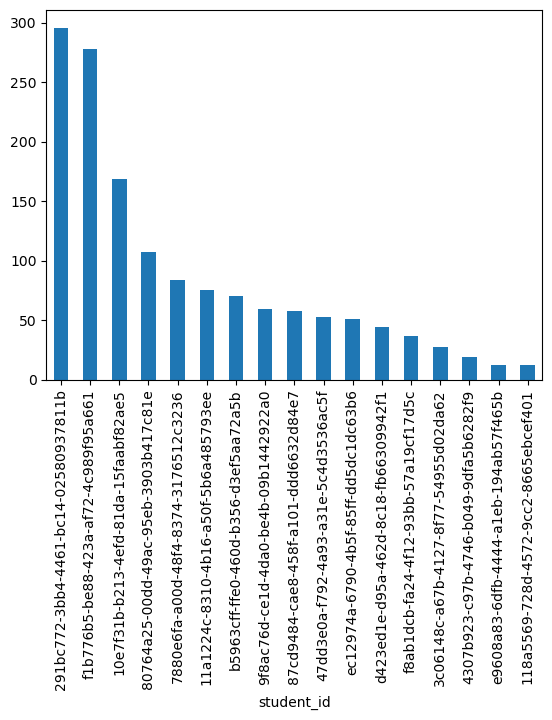

In [19]:
# Warmup 3b: Plot this as a bar graph.
top_answers["answers"].plot.bar()

<Axes: xlabel='role'>

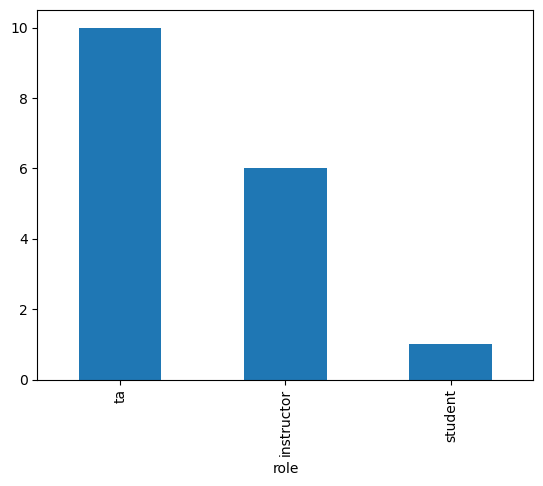

In [8]:
# Warmup 3c: Plot the contributions as a bar graph.
top_answers["role"].value_counts().plot.bar()

In [20]:
# Warmup 3d: Can you get this same data using SQL?
qry("""
SELECT role, COUNT(*) as NumAnswers
FROM piazza
WHERE answers > 10
GROUP BY role
ORDER BY NumAnswers DESC
""")

role  NumAnswers
0          ta          10
1  instructor           6
2     student           1

In [21]:
# Warmup 3e: What about their average # of days online as well?
qry("""
SELECT role, COUNT(*) as NumAnswers, AVG(days_online) as AvgDaysOnline
FROM piazza
WHERE answers > 10
GROUP BY role
ORDER BY NumAnswers DESC
""")

role  NumAnswers  AvgDaysOnline
0          ta          10          142.0
1  instructor           6          237.0
2     student           1          233.0

In [ ]:
# Warmup 3f: Can we do that in Pandas as well?
# Today's topic!

# Today's Learning Objectives: 

* Setting column as index for pandas `DataFrame`
* Identify, drop, or fill missing values (`np.NaN`) using Pandas `isna`, `dropna`, and `fillna`
* Applying transformations to `DataFrame`:
  * Use `apply` on pandas `Series` to apply a transformation function
  * Use `replace` to replace all target values in Pandas `Series` and `DataFrame` rows / columns
* Filter, aggregate, group, and summarize information in a `DataFrame` with `groupby`
* Convert .groupby examples to SQL
* Solving the same question using SQL and pandas `DataFrame` manipulations:
  * filtering, grouping, and aggregation / summarization

In [22]:
# Sort by name... What do we notice?
piazza_df.sort_values("name") # Some names are missing!

name                  email  \
student_id                                                                  
7c1bed42-3d12-4027-bdce-d3df0b9443b4                    hot_time@wisc.edu   
9434914d-88d0-4e64-b3b7-4e864635cfdb                  thick_love@wisc.edu   
6ad21c80-1853-4918-a6dc-a5814199b1c5                serious_door@wisc.edu   
15960bb8-bdc7-4c5e-83dc-99bb95c96f94                  young_time@wisc.edu   
5c82bf29-303e-4d29-b17b-4709933dbd4b                   calm_star@wisc.edu   
...                                            ...                    ...   
74cbaf6e-34e7-4dd0-b577-8164f1d525d7   young music   young_music@wisc.edu   
50c9efda-f01d-43ca-b79e-0dfd03199020   young ocean   young_ocean@wisc.edu   
ab58109e-5493-4893-a301-d85533255707   young river                          
8777e788-7e7e-4193-8f1a-deed767ecdca    young road    young_road@wisc.edu   
0e67e72c-55cd-4e66-8841-1daffb3f5204  young window  young_window@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
7c1bed42-3d12-4027-bdce-d3df0b9443b4  student           86      2        0   
9434914d-88d0-4e64-b3b7-4e864635cfdb  student           19      0        0   
6ad21c80-1853-4918-a6dc-a5814199b1c5  student            4      0        0   
15960bb8-bdc7-4c5e-83dc-99bb95c96f94  student          198      8        0   
5c82bf29-303e-4d29-b17b-4709933dbd4b  student           54      1        0   
...                                       ...          ...    ...      ...   
74cbaf6e-34e7-4dd0-b577-8164f1d525d7  student           25      1        0   
50c9efda-f01d-43ca-b79e-0dfd03199020  student          298      2        2   
ab58109e-5493-4893-a301-d85533255707       ta          143      0        0   
8777e788-7e7e-4193-8f1a-deed767ecdca  student           18      3        0   
0e67e72c-55cd-4e66-8841-1daffb3f5204  student           45      1        1   

                                      edits  followups  replies_to_followups  
student_id                                                                    
7c1bed42-3d12-4027-bdce-d3df0b9443b4      0          0                     0  
9434914d-88d0-4e64-b3b7-4e864635cfdb      0          0                     0  
6ad21c80-1853-4918-a6dc-a5814199b1c5      0          0                     0  
15960bb8-bdc7-4c5e-83dc-99bb95c96f94      0          1                     0  
5c82bf29-303e-4d29-b17b-4709933dbd4b      0          0                     0  
...                                     ...        ...                   ...  
74cbaf6e-34e7-4dd0-b577-8164f1d525d7      0          0                     0  
50c9efda-f01d-43ca-b79e-0dfd03199020      2          0                     0  
ab58109e-5493-4893-a301-d85533255707      0          0                     0  
8777e788-7e7e-4193-8f1a-deed767ecdca      0          0                     0  
0e67e72c-55cd-4e66-8841-1daffb3f5204      0          0                     0  

[800 rows x 9 columns]

### Not a Number

- `np.NaN` is the floating point representation of Not a Number
- You do not need to know / learn the details about the `numpy` package 

### Replacing / modifying values within the `DataFrame`

Syntax: `df.replace(<TARGET>, <REPLACE>)`

Let's now replace the missing values (empty strings) with `np.NaN`

In [23]:
# Let's replace these empty strings with a special value.
piazza_df = piazza_df.replace("", np.NaN)
piazza_df

name                   email  \
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu   
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu   
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu   
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu   
...                                             ...                     ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu   
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu   
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu   
36e2dbd3-95c9-4ee7-8e02-db96656906df    fast friend    fast_friend@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a  student            0      0        0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1  student            0      0        0   
4af54672-102f-4788-bbf0-e48a7e6b1e59  student            0      0        0   
295ee845-0eb7-44aa-acd6-8809dc6700fa  student            0      0        0   
4f800f63-e006-436b-8aed-9ce43b48bf76  student            0      0        0   
...                                       ...          ...    ...      ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6  student            9      0        0   
50a18796-c7ff-4a20-9f8f-30d9db075db5  student           94      1        0   
877efa7c-a88d-45f9-85b0-73b2378f493c  student           47      2        1   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  student           85      8        0   
36e2dbd3-95c9-4ee7-8e02-db96656906df  student           39      3        0   

                                      edits  followups  replies_to_followups  
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a      0          0                     0  
0fda0d07-ff49-4f6b-86de-c0e24ee211f1      0          0                     0  
4af54672-102f-4788-bbf0-e48a7e6b1e59      0          0                     0  
295ee845-0eb7-44aa-acd6-8809dc6700fa      0          0                     0  
4f800f63-e006-436b-8aed-9ce43b48bf76      0          0                     0  
...                                     ...        ...                   ...  
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6      0          0                     0  
50a18796-c7ff-4a20-9f8f-30d9db075db5      0          0                     0  
877efa7c-a88d-45f9-85b0-73b2378f493c      0          1                     2  
3fd9b2c0-7974-4f14-896e-9b59dfda2bca      0          0                     0  
36e2dbd3-95c9-4ee7-8e02-db96656906df      0          0                     0  

[800 rows x 9 columns]

In [24]:
# Sort by name again... What do we notice?
piazza_df.sort_values("name") # NaN's are at the end!

name                    email  \
student_id                                                                      
d19df22f-6fe2-4bbb-8f6d-3fcbb3a31b8e     ancient art     ancient_art@wisc.edu   
808afa38-ed47-4760-aa74-5239aa741356  ancient bridge  ancient_bridge@wisc.edu   
d399cbd5-9a08-4c87-bb2b-007c25297790     ancient bus                      NaN   
fc46cec5-3b41-4bf6-b720-ada21a1c800e     ancient cat     ancient_cat@wisc.edu   
021a54be-5de0-4cea-a003-ca4782bbb9cb   ancient chair   ancient_chair@wisc.edu   
...                                              ...                      ...   
9212f49b-40da-4bf9-87b0-a171ad32669d             NaN   ancient_river@wisc.edu   
b5963cff-ffe0-460d-b356-d3ef5aa72a5b             NaN                      NaN   
6c42a9e8-0b53-431d-9c49-1069c1b0e841             NaN     short_house@wisc.edu   
cf055ef8-4baa-4a43-851c-060e2e4f310d             NaN      noisy_bird@wisc.edu   
d82d6135-8953-4521-ac93-cef0d01bf2b5             NaN     serious_sun@wisc.edu   

                                            role  days_online  posts  answers  \
student_id                                                                      
d19df22f-6fe2-4bbb-8f6d-3fcbb3a31b8e     student           97      0        0   
808afa38-ed47-4760-aa74-5239aa741356  instructor          122      1        1   
d399cbd5-9a08-4c87-bb2b-007c25297790     student            1      0        0   
fc46cec5-3b41-4bf6-b720-ada21a1c800e     student           96      9        0   
021a54be-5de0-4cea-a003-ca4782bbb9cb     student           19      0        1   
...                                          ...          ...    ...      ...   
9212f49b-40da-4bf9-87b0-a171ad32669d     student          198      2        0   
b5963cff-ffe0-460d-b356-d3ef5aa72a5b  instructor           58      0       70   
6c42a9e8-0b53-431d-9c49-1069c1b0e841     student          233      0        1   
cf055ef8-4baa-4a43-851c-060e2e4f310d     student           38      9        0   
d82d6135-8953-4521-ac93-cef0d01bf2b5     student           60      1        0   

                                      edits  followups  replies_to_followups  
student_id                                                                    
d19df22f-6fe2-4bbb-8f6d-3fcbb3a31b8e      0          0                     0  
808afa38-ed47-4760-aa74-5239aa741356      0          0                     0  
d399cbd5-9a08-4c87-bb2b-007c25297790      0          0                     0  
fc46cec5-3b41-4bf6-b720-ada21a1c800e      0          2                     1  
021a54be-5de0-4cea-a003-ca4782bbb9cb      0          0                     0  
...                                     ...        ...                   ...  
9212f49b-40da-4bf9-87b0-a171ad32669d      0          0                     0  
b5963cff-ffe0-460d-b356-d3ef5aa72a5b      7          0                     4  
6c42a9e8-0b53-431d-9c49-1069c1b0e841      0          0                     0  
cf055ef8-4baa-4a43-851c-060e2e4f310d      0          1                     1  
d82d6135-8953-4521-ac93-cef0d01bf2b5      0          0                     0  

[800 rows x 9 columns]

### Checking for missing values

Syntax: `Series.isna()`
- Returns a boolean Series

In [25]:
# Run isna() on the name column
piazza_df["name"].isna()

student_id
bffd301b-3ab9-42d7-bfb1-e5d56117543a    False
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    False
4af54672-102f-4788-bbf0-e48a7e6b1e59    False
295ee845-0eb7-44aa-acd6-8809dc6700fa    False
4f800f63-e006-436b-8aed-9ce43b48bf76    False
                                        ...  
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6    False
50a18796-c7ff-4a20-9f8f-30d9db075db5    False
877efa7c-a88d-45f9-85b0-73b2378f493c    False
3fd9b2c0-7974-4f14-896e-9b59dfda2bca    False
36e2dbd3-95c9-4ee7-8e02-db96656906df    False
Name: name, Length: 800, dtype: bool

In [26]:
# How many people are missing a name?
piazza_df["name"].isna().value_counts()

name
False    742
True      58
Name: count, dtype: int64

In [27]:
# How many people are missing an email?
piazza_df["email"].isna().value_counts()

email
False    741
True      59
Name: count, dtype: int64

In [29]:
# How many people are missing both a name and email?
((piazza_df["name"].isna()) & (piazza_df["email"].isna())).value_counts()

False    788
True      12
Name: count, dtype: int64

In [30]:
# How many people are missing either a name or email?
((piazza_df["name"].isna()) | (piazza_df["email"].isna())).value_counts()

False    695
True     105
Name: count, dtype: int64

In [31]:
# So... What do we do?
#  1. Drop those rows
#  2. Interpolate / Best Guess

In [32]:
# Option 1: Drop those rows.
pure_piazza_df = piazza_df.dropna()
pure_piazza_df

name                   email  \
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu   
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu   
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu   
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu   
...                                             ...                     ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu   
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu   
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu   
36e2dbd3-95c9-4ee7-8e02-db96656906df    fast friend    fast_friend@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a  student            0      0        0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1  student            0      0        0   
4af54672-102f-4788-bbf0-e48a7e6b1e59  student            0      0        0   
295ee845-0eb7-44aa-acd6-8809dc6700fa  student            0      0        0   
4f800f63-e006-436b-8aed-9ce43b48bf76  student            0      0        0   
...                                       ...          ...    ...      ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6  student            9      0        0   
50a18796-c7ff-4a20-9f8f-30d9db075db5  student           94      1        0   
877efa7c-a88d-45f9-85b0-73b2378f493c  student           47      2        1   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  student           85      8        0   
36e2dbd3-95c9-4ee7-8e02-db96656906df  student           39      3        0   

                                      edits  followups  replies_to_followups  
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a      0          0                     0  
0fda0d07-ff49-4f6b-86de-c0e24ee211f1      0          0                     0  
4af54672-102f-4788-bbf0-e48a7e6b1e59      0          0                     0  
295ee845-0eb7-44aa-acd6-8809dc6700fa      0          0                     0  
4f800f63-e006-436b-8aed-9ce43b48bf76      0          0                     0  
...                                     ...        ...                   ...  
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6      0          0                     0  
50a18796-c7ff-4a20-9f8f-30d9db075db5      0          0                     0  
877efa7c-a88d-45f9-85b0-73b2378f493c      0          1                     2  
3fd9b2c0-7974-4f14-896e-9b59dfda2bca      0          0                     0  
36e2dbd3-95c9-4ee7-8e02-db96656906df      0          0                     0  

[695 rows x 9 columns]

In [33]:
# Option 2a: Interpolate / Best Guess
anon_piazza_df = piazza_df.fillna("Anonymous")
anon_piazza_df

name                   email  \
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu   
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu   
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu   
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu   
...                                             ...                     ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu   
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu   
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu   
36e2dbd3-95c9-4ee7-8e02-db96656906df    fast friend    fast_friend@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a  student            0      0        0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1  student            0      0        0   
4af54672-102f-4788-bbf0-e48a7e6b1e59  student            0      0        0   
295ee845-0eb7-44aa-acd6-8809dc6700fa  student            0      0        0   
4f800f63-e006-436b-8aed-9ce43b48bf76  student            0      0        0   
...                                       ...          ...    ...      ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6  student            9      0        0   
50a18796-c7ff-4a20-9f8f-30d9db075db5  student           94      1        0   
877efa7c-a88d-45f9-85b0-73b2378f493c  student           47      2        1   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  student           85      8        0   
36e2dbd3-95c9-4ee7-8e02-db96656906df  student           39      3        0   

                                      edits  followups  replies_to_followups  
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a      0          0                     0  
0fda0d07-ff49-4f6b-86de-c0e24ee211f1      0          0                     0  
4af54672-102f-4788-bbf0-e48a7e6b1e59      0          0                     0  
295ee845-0eb7-44aa-acd6-8809dc6700fa      0          0                     0  
4f800f63-e006-436b-8aed-9ce43b48bf76      0          0                     0  
...                                     ...        ...                   ...  
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6      0          0                     0  
50a18796-c7ff-4a20-9f8f-30d9db075db5      0          0                     0  
877efa7c-a88d-45f9-85b0-73b2378f493c      0          1                     2  
3fd9b2c0-7974-4f14-896e-9b59dfda2bca      0          0                     0  
36e2dbd3-95c9-4ee7-8e02-db96656906df      0          0                     0  

[800 rows x 9 columns]

In [34]:
# Create a function to take an email (e.g. "calm_star@wisc.edu")
# and return the name (e.g. "calm star")
def parse_name_from_email(email):
    if pd.isna(email):
        return np.nan
    else:
        return email.split("@")[0].replace("_", " ")

# Test your function!
parse_name_from_email("calm_star@wisc.edu")

'calm star'

### Review: `Pandas.Series.apply(...)`
Syntax: `Series.apply(<FUNCTION OBJECT REFERENCE>)`
- applies input function to every element of the Series.
- Returns a new `Series`

In [35]:
# Now, apply that function to each value in email!
piazza_df["guessed_name"] = piazza_df["email"].apply(parse_name_from_email)
piazza_df

name                   email  \
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu   
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu   
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu   
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu   
...                                             ...                     ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu   
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu   
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu   
36e2dbd3-95c9-4ee7-8e02-db96656906df    fast friend    fast_friend@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a  student            0      0        0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1  student            0      0        0   
4af54672-102f-4788-bbf0-e48a7e6b1e59  student            0      0        0   
295ee845-0eb7-44aa-acd6-8809dc6700fa  student            0      0        0   
4f800f63-e006-436b-8aed-9ce43b48bf76  student            0      0        0   
...                                       ...          ...    ...      ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6  student            9      0        0   
50a18796-c7ff-4a20-9f8f-30d9db075db5  student           94      1        0   
877efa7c-a88d-45f9-85b0-73b2378f493c  student           47      2        1   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  student           85      8        0   
36e2dbd3-95c9-4ee7-8e02-db96656906df  student           39      3        0   

                                      edits  followups  replies_to_followups  \
student_id                                                                     
bffd301b-3ab9-42d7-bfb1-e5d56117543a      0          0                     0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1      0          0                     0   
4af54672-102f-4788-bbf0-e48a7e6b1e59      0          0                     0   
295ee845-0eb7-44aa-acd6-8809dc6700fa      0          0                     0   
4f800f63-e006-436b-8aed-9ce43b48bf76      0          0                     0   
...                                     ...        ...                   ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6      0          0                     0   
50a18796-c7ff-4a20-9f8f-30d9db075db5      0          0                     0   
877efa7c-a88d-45f9-85b0-73b2378f493c      0          1                     2   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca      0          0                     0   
36e2dbd3-95c9-4ee7-8e02-db96656906df      0          0                     0   

                                       guessed_name  
student_id                                           
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city  
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee  
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love  
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house  
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student  
...                                             ...  
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee  
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music  
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music  
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  
36e2dbd3-95c9-4ee7-8e02-db96656906df    fast friend  

[800 rows x 10 columns]

In [36]:
# Create a function to take a name (e.g. "calm star")
# and return the email (e.g. "calm_star@wisc.edu")
def parse_email_from_name(name):
    if pd.isna(name):
        return np.nan
    else:
        return name.replace(" ", "_") + "@wisc.edu"

# Test your function!
parse_email_from_name("calm star")

'calm_star@wisc.edu'

In [37]:
# Now, apply that function to each value in name!
piazza_df["guessed_email"] = piazza_df["name"].apply(parse_email_from_name)
piazza_df

name                   email  \
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu   
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu   
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu   
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu   
...                                             ...                     ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu   
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu   
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu   
36e2dbd3-95c9-4ee7-8e02-db96656906df    fast friend    fast_friend@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a  student            0      0        0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1  student            0      0        0   
4af54672-102f-4788-bbf0-e48a7e6b1e59  student            0      0        0   
295ee845-0eb7-44aa-acd6-8809dc6700fa  student            0      0        0   
4f800f63-e006-436b-8aed-9ce43b48bf76  student            0      0        0   
...                                       ...          ...    ...      ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6  student            9      0        0   
50a18796-c7ff-4a20-9f8f-30d9db075db5  student           94      1        0   
877efa7c-a88d-45f9-85b0-73b2378f493c  student           47      2        1   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  student           85      8        0   
36e2dbd3-95c9-4ee7-8e02-db96656906df  student           39      3        0   

                                      edits  followups  replies_to_followups  \
student_id                                                                     
bffd301b-3ab9-42d7-bfb1-e5d56117543a      0          0                     0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1      0          0                     0   
4af54672-102f-4788-bbf0-e48a7e6b1e59      0          0                     0   
295ee845-0eb7-44aa-acd6-8809dc6700fa      0          0                     0   
4f800f63-e006-436b-8aed-9ce43b48bf76      0          0                     0   
...                                     ...        ...                   ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6      0          0                     0   
50a18796-c7ff-4a20-9f8f-30d9db075db5      0          0                     0   
877efa7c-a88d-45f9-85b0-73b2378f493c      0          1                     2   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca      0          0                     0   
36e2dbd3-95c9-4ee7-8e02-db96656906df      0          0                     0   

                                       guessed_name           guessed_email  
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu  
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu  
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu  
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu  
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu  
...                                             ...                     ...  
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu  
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu  
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu  
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu  
36e2dbd3-95c9-4ee7-8e02-db9

### `Pandas.DataFrame.apply(...)`
Syntax: `DataFrame.apply(<FUNCTION OBJECT REFERENCE>, axis=1)`
- `axis=1` means apply to each row.
- returns a new `Series`

In [ ]:
# If the name has a value, use it, otherwise use our best guess!
piazza_df["name"] = piazza_df.apply(lambda r : r["guessed_name"] if pd.isna(r["name"]) else r["name"], axis=1)

In [ ]:
# Same thing for email!
piazza_df["email"] = piazza_df.apply(lambda r : r["guessed_email"] if pd.isna(r["email"]) else r["email"], axis=1)

In [ ]:
# Drop the guessing columns
piazza_df = piazza_df.drop("guessed_name", axis=1)
piazza_df = piazza_df.drop("guessed_email", axis=1)

In [ ]:
# How many rows are missing data now?
len(piazza_df.dropna()) # only 12!

In [ ]:
# Give a name of "anonymous" and email of "anonymous@wisc.edu"
# to anyone with left with missing data.
piazza_df["name"] = piazza_df["name"].fillna("anonymous")
piazza_df["email"] = piazza_df["email"].fillna("anonymous@wisc.edu")
len(piazza_df)

### `Pandas.DataFrame.groupby(...)`

Syntax: `DataFrame.groupby(<COLUMN>)`
- Returns a `groupby` object
- Need to apply aggregation functions to use the return value of `groupby`

In [39]:
# What does this return?
piazza_df.groupby("role") # a groupby object!

In [42]:
# Try getting the "mean" of this groupby object.
piazza_df.groupby("role").mean(numeric_only=True)

days_online     posts    answers      edits  followups  \
role                                                                 
instructor   181.333333  5.000000  63.916667  18.750000  10.916667   
student       80.493386  2.124339   0.457672   0.125661   0.488095   
ta           146.062500  1.343750  21.500000   6.500000   4.375000   

            replies_to_followups  
role                              
instructor             16.083333  
student                 0.412698  
ta                      6.500000

In [43]:
# How many answers does the average instructor, student, and TA give?
piazza_df[["role", "answers"]].groupby("role").mean()

answers
role                 
instructor  63.916667
student      0.457672
ta          21.500000

In [45]:
# How would we write this in SQL?
qry("""
SELECT role, AVG(answers)
FROM piazza
GROUP BY role
""")

role  AVG(answers)
0  instructor     63.916667
1     student      0.457672
2          ta     21.500000

In [46]:
# What is the total number of days spent online for instructors, students, and TAs?
# Order your answer from lowest to highest
piazza_df[["role", "days_online"]].groupby("role").sum().sort_values("days_online")

days_online
role                   
instructor         2176
ta                 4674
student           60853

In [47]:
# How would we write this in SQL?
qry("""
SELECT role, SUM(days_online) as TotalDaysOnline
FROM piazza
GROUP BY role
ORDER BY TotalDaysOnline
""")

role  AvgDaysOnline
0  instructor           2176
1          ta           4674
2     student          60853

In [48]:
# Of those individuals who spend less than 100 days online,
# how does their average number of posts compare to those that
# spend 100 days or more online? Do your analysis by role as well.

less_than_100 = piazza_df[piazza_df["days_online"] < 100]
more_than_100 = piazza_df[piazza_df["days_online"] >= 100]

# In general, they post less...
print(more_than_100["posts"].mean(), less_than_100["posts"].mean())
print()

# ... and this is also generally true.
print(more_than_100[["role", "posts"]].groupby("role").mean())
print(less_than_100[["role", "posts"]].groupby("role").mean())

3.2086614173228347 1.6373626373626373

               posts
role                
instructor  7.375000
student     3.200893
ta          1.772727
               posts
role                
instructor  0.250000
student     1.671053
ta          0.400000


In [49]:
# How would we write this in SQL?
qry("""
SELECT role, AVG(posts) as AvgPosts
FROM piazza
WHERE days_online < 100
GROUP BY role
""")

role  AvgPosts
0  instructor  0.250000
1     student  1.671053
2          ta  0.400000

In [50]:
qry("""
SELECT role, AVG(posts) as AvgPosts
FROM piazza
WHERE days_online >= 100
GROUP BY role
""")

role  AvgPosts
0  instructor  7.375000
1     student  3.200893
2          ta  1.772727

In [51]:
# What percentage of instructors, students, and TAs did not write a single answer,
# followup, or reply to a followup?
no_answers = piazza_df[(piazza_df["answers"] == 0) & (piazza_df["followups"] == 0) & (piazza_df["replies_to_followups"] == 0)]
no_answers["role"].value_counts() / piazza_df["role"].value_counts() * 100

role
student       53.968254
ta            62.500000
instructor    41.666667
Name: count, dtype: float64

In [ ]:
# How would we write this in SQL?
# The best we can write (without knowing subqueries) is how many!
qry("""
SELECT role, COUNT(*)
FROM piazza
WHERE answers = 0 AND followups = 0 AND replies_to_followups = 0
GROUP BY role
""")

In [ ]:
# ... and then compare this with the total #!
qry("""
SELECT role, COUNT(*)
FROM piazza
GROUP BY role
""")

In [ ]:
conn.close()